In [1]:
import os,sys

notebook_dir = os.getcwd()

#add path
sys.path.append(os.path.abspath(os.path.join(notebook_dir, '..')))

In [2]:
from scripts.load_data import *
from scripts.data_preparation import *
from scripts.training_and_evaluation import *

In [3]:
fra_data_path = '../../Data/Fraud_Data.csv'
# IpAd_data_path = '../../Data/IpAddress_to_Country.csv'
cred_data_path = '../../Data/creditcard.csv/creditcard.csv'

loaded_data_fra = load_data(fra_data_path)
loaded_data_cred = load_data(cred_data_path)

loaded_data_fra.head(5)
# loaded_data_cred.head(5)


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [4]:
# Sample only 5000 rows for training
df_fraud_sampled = loaded_data_fra.sample(n=5000, random_state=42)
df_cred_sampled = loaded_data_cred.sample(n=5000, random_state=42)
df_fraud_sampled

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
92865,324640,2015-01-23 09:55:40,2015-03-04 01:26:04,45,YSWUULDQAGHTI,Ads,IE,F,33,3.315147e+09,0
50746,244111,2015-06-24 17:42:18,2015-06-25 12:00:50,54,MMEFSFDBNLQZI,SEO,IE,M,36,9.916283e+08,0
128421,81345,2015-04-04 05:17:38,2015-07-11 07:35:20,62,WQNNNGXSRAMWD,Ads,IE,F,19,2.744427e+08,0
146243,25395,2015-08-17 21:04:49,2015-10-17 18:00:17,66,KXZJMHXNVEGLC,SEO,Chrome,F,49,2.654816e+09,1
44524,11703,2015-02-01 08:27:50,2015-03-21 14:23:17,34,XJYCMQURWOUCE,Ads,Chrome,F,45,1.419980e+09,0
...,...,...,...,...,...,...,...,...,...,...,...
137174,219673,2015-02-05 15:42:27,2015-05-14 04:13:58,73,NUZSNSUOULASB,SEO,Chrome,M,34,5.016961e+08,0
4691,205825,2015-01-31 12:28:42,2015-04-12 08:52:00,39,CQGMNHGMYZHHD,SEO,Chrome,M,41,2.290381e+09,0
48862,280425,2015-05-29 12:02:00,2015-07-01 00:07:29,16,NUTPMIQHBKXRO,SEO,Chrome,F,39,2.434768e+09,0
10341,215358,2015-06-17 05:07:03,2015-09-18 14:59:26,34,AIPJSMIQXWHFS,SEO,FireFox,M,48,1.340312e+09,0


In [5]:
# Prepare data
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = data_preparation(df_fraud_sampled)
X_train_cc, X_test_cc, y_train_cc, y_test_cc = data_preparation(df_cred_sampled)

In [6]:
# Define models
models = define_models()

In [7]:
print(X_test_fraud)
print(X_test_cc)

        user_id  purchase_value  age    ip_address  signup_year  signup_month  \
70515    321620              51   37  3.729075e+09         2015             4   
32025    320315              24   37  3.931029e+09         2015             5   
48116    281113              30   32  1.325531e+09         2015             4   
56137    173798              38   25  4.030312e+09         2015             1   
34153    394928              77   34  3.809045e+09         2015             2   
...         ...             ...  ...           ...          ...           ...   
14649    157596              40   31  3.275120e+09         2015             2   
82520    131735              44   33  2.396878e+09         2015             1   
111919   236455              32   49  3.763019e+09         2015             6   
138101   337742              11   35  2.549481e+09         2015             4   
77593     52274              45   28  3.413652e+09         2015             8   

        signup_day  signup_

In [ ]:
# Evaluate models
results1 = evaluate_models(X_train_fraud, y_train_fraud, X_test_fraud, y_test_fraud, models)

# Print evaluation results
for model_name, metrics in results1.items():
    trained_model1 = metrics['model']
    print(f"Model: {model_name}\n{metrics['report']}\nConfusion Matrix:\n{metrics['confusion_matrix']}\nAccuracy: {metrics['accuracy']:.4f}\n")

c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       918
           1       0.00      0.00      0.00        82

    accuracy                           0.92      1000
   macro avg       0.46      0.50      0.48      1000
weighted avg       0.84      0.92      0.88      1000

Confusion Matrix:
[[918   0]
 [ 82   0]]
Accuracy: 0.9180

Model: Decision Tree
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       918
           1       0.98      0.50      0.66        82

    accuracy                           0.96      1000
   macro avg       0.97      0.75      0.82      1000
weighted avg       0.96      0.96      0.95      1000

Confusion Matrix:
[[917   1]
 [ 41  41]]
Accuracy: 0.9580

Model: Random Forest
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       918
           1       0.98      0.49      0.65       

c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

In [ ]:
results1

{'Logistic Regression': {'report': '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1000\n\n    accuracy                           1.00      1000\n   macro avg       1.00      1.00      1.00      1000\nweighted avg       1.00      1.00      1.00      1000\n',
  'confusion_matrix': array([[1000]]),
  'accuracy': np.float64(1.0)},
 'Decision Tree': {'report': '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1000\n\n    accuracy                           1.00      1000\n   macro avg       1.00      1.00      1.00      1000\nweighted avg       1.00      1.00      1.00      1000\n',
  'confusion_matrix': array([[1000]]),
  'accuracy': np.float64(1.0)},
 'Random Forest': {'report': '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1000\n\n    accuracy                           1.00      1000\n   macro avg       1.00      

In [8]:

# Evaluate models
results2 = evaluate_models(X_train_cc, y_train_cc, X_test_cc, y_test_cc, models)

# Print evaluation results
for model_name, metrics in results2.items():
    trained_model2 = metrics['model']
    print(f"Model: {model_name}\n{metrics['report']}\nConfusion Matrix:\n{metrics['confusion_matrix']}\nAccuracy: {metrics['accuracy']:.4f}\n")

c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\sklearn\metrics\_classification.py:407: UserWarn

Model: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Confusion Matrix:
[[1000]]
Accuracy: 1.0000

Model: Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Confusion Matrix:
[[1000]]
Accuracy: 1.0000

Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Confusion Matrix:
[[10

c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [8]:
# Log results
log_results(models, X_train_fraud, y_train_fraud, X_test_fraud, y_test_fraud)

c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
2025/02/13 15:37:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\sklearn\uti

In [11]:
from scripts.SHAP_and_LIME import *

c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
print(X_test_cc.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


In [9]:
for model_name, metrics in results2.items():
    print(f"Model: {model_name}, Model Object: {metrics['model']}")

Model: Logistic Regression, Model Object: LogisticRegression()
Model: Decision Tree, Model Object: DecisionTreeClassifier()
Model: Random Forest, Model Object: RandomForestClassifier()
Model: Gradient Boosting, Model Object: GradientBoostingClassifier()
Model: MLP, Model Object: MLPClassifier(max_iter=100)
Model: LSTM, Model Object: None


100%|██████████| 1000/1000 [13:53<00:00,  1.20it/s]


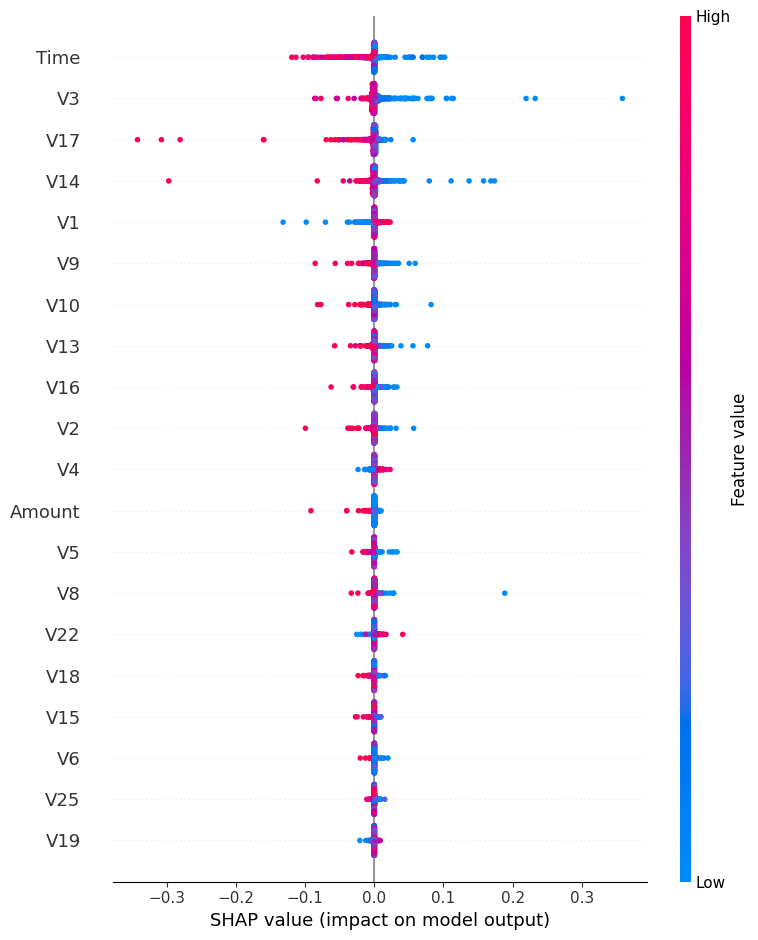

100%|██████████| 1000/1000 [14:36<00:00,  1.14it/s]


  0%|          | 0/1000 [00:00<?, ?it/s]c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\sklearn\linear_model\_least_angle.py:2301: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\sklearn\linear_model\_least_angle.py:2302: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
  0%|          | 1/1000 [00:00<15:41,  1.06it/s]c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\sklearn\linear_model\_least_angle.py:2301: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\sklearn\linear_model\_least_angle.py:2302: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.nois

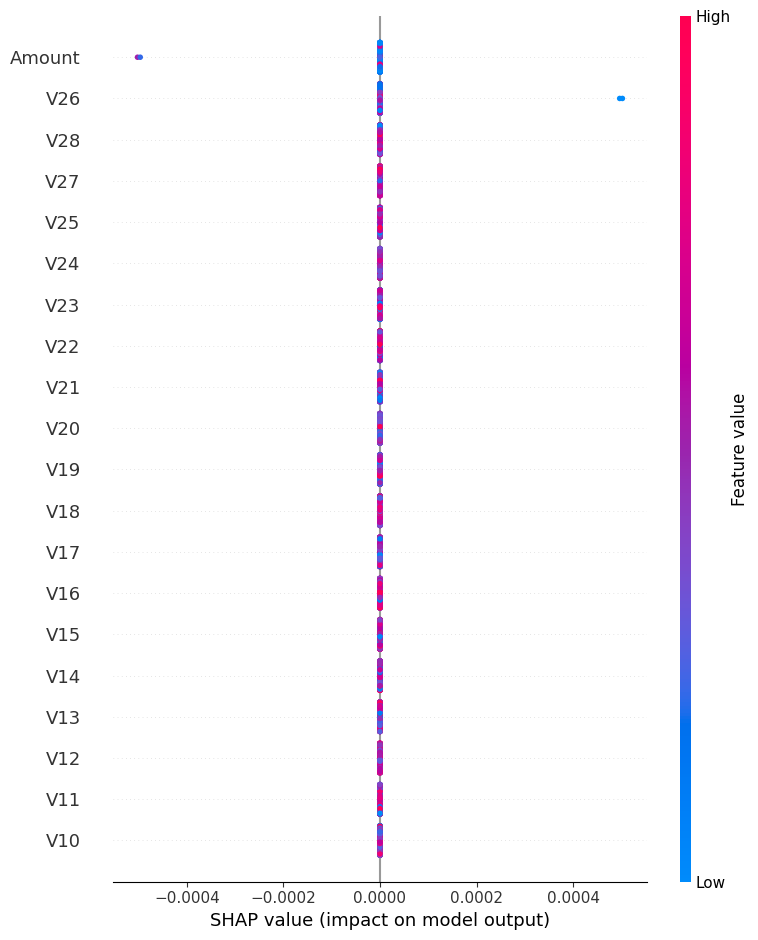

  0%|          | 0/1000 [00:00<?, ?it/s]c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\sklearn\linear_model\_least_angle.py:2301: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\sklearn\linear_model\_least_angle.py:2302: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
  0%|          | 1/1000 [00:02<37:44,  2.27s/it]c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\sklearn\linear_model\_least_angle.py:2301: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\sklearn\linear_model\_least_angle.py:2302: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.nois

KeyboardInterrupt: 

In [12]:
for model_name, metrics in results2.items():
    trained_model2 = metrics['model']
    shap_values = shap_expl(trained_model2, X_test_cc, K=100)
    shap_force_plot(trained_model2, X_test_cc, instance_index=0, K=100)

In [ ]:
# Using 'Amount' as the feature name
shap_dependence_plot(trained_model2, X_test_cc, feature_name="Amount")

# Or using 'Time' as the feature name
shap_dependence_plot(trained_model2, X_test_cc, feature_name="Time")

  0%|          | 0/1000 [00:00<?, ?it/s]c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\sklearn\linear_model\_least_angle.py:2301: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\sklearn\linear_model\_least_angle.py:2302: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
  0%|          | 1/1000 [00:03<51:39,  3.10s/it]c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\sklearn\linear_model\_least_angle.py:2301: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\sklearn\linear_model\_least_angle.py:2302: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.nois

In [ ]:
lime_exp = lime_expl(trained_model2, X_train_cc, X_test_cc, instance_index=0)
plot_lime_explanation(lime_exp)